<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Lytkin%20Vladimir/model_netoptik_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Загрузка датасета

# монтование GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Загрузка zip-архива с GoogleDrive на диск виртуальной машины colab
import gdown
gdown.download('https://drive.google.com/uc?id=1FNq2k93jLoXEp7eQslg94Rd2bdWI09cj', None, quiet=True)

'glass_material.zip'

In [3]:
# Разархивация датасета в директорию 'content/frames'
!unzip -qo "glass_material.zip" -d /content/frames

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/frames/'

In [4]:
# Проверка загрузки
import os
os.listdir(IMAGE_PATH)

['Пластик 500', 'Комбинированный 250', 'Металл 418']

In [5]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['Комбинированный 250', 'Металл 418', 'Пластик 500']


In [6]:
# списки файлов для всех классов
for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Комбинированный 250 : ['balenciaga-bal0091-ant-s2-2 (2).jpg', 'rivera-1399-c5-c1-s2-1 (3).jpg', 'vogue-vo3963-982s -s2-2.jpg', 'despada-ds868-c3-s2-2 (2).jpg', 'swarovski-sw5036-032-s2-1 (2).jpg', 'carrera-carrera200-kb7-s2-1 (3).jpg', 'emilio-pucci-ep2699-244-s2-2 (2).jpg', 'la-stella-778-с2-s2-2 (2).jpg', 'ana-hickmann-ah1277-02a-s2-1 (2).jpg', 'roy-robson-60116-1-s2-1 (1).jpg', 'ana-hickmann-ah1436-g21-s2-1 (2).jpg', 'marc-jacobs-marc142-csa-s2-2 (1).jpg', 'swarovski-sw5203-d-032-s2-1 (18).jpg', 'fabiano-frd652020-c1-s2-2 (1).jpg', 'carrera-carrera271-m4p-s2-1 (2).jpg', 'destijl-s2205-s2-2 (2).jpg', 'riva-8417-c8matt-s2-2 (2).jpg', 'blancia-bc180-c1-s2-2 (2).jpg', 'ray-ban-rb5360-5715-s2-1 (3).jpg', 'dsquared2-dq5277--001-s2-1 (6).jpg', 'swarovski-sk5156-080-s2-1 (3).jpg', 'riva-9685-c8-c6-s2-2 (2).jpg', 'salvatore-ferragamo-1701-511-s2-1 (23).jpg', 'tag-heuer-th3002-006-s2-2 (2).jpg', 'rivera-1365-c6-c3-s2-2 (2).jpg', 'alexander-mcqueen-amq4257-8sm-s2-2 (2).jpg', 'christian-dior-cd

In [7]:
#Библиотеки для отрисовки и генерации случайных чисел
from PIL import Image
import random
import matplotlib.pyplot as plt

%matplotlib inline

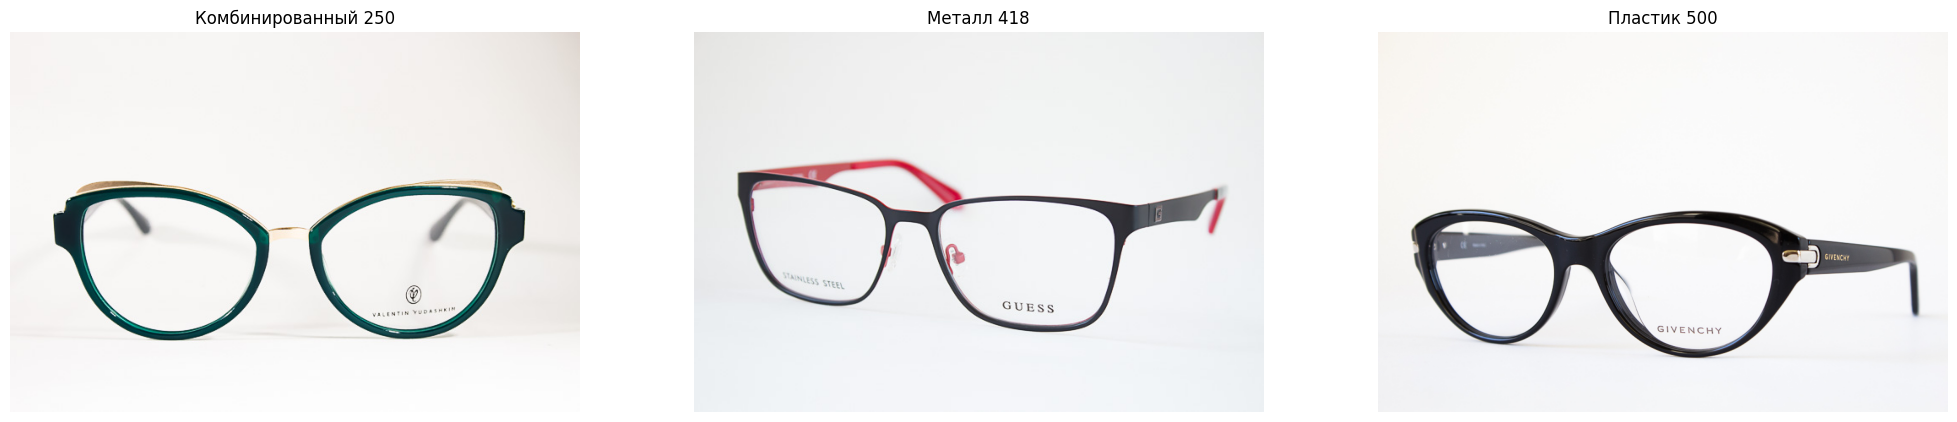

In [8]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [9]:
# Создание списков файлов и их меток класса

data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} оправ')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))
print('file=', data_files[600], ' ', 'label=', data_labels[600])

Размер класса Комбинированный 250 составляет 514 оправ
Размер класса Металл 418 составляет 418 оправ
Размер класса Пластик 500 составляет 499 оправ
Общий размер базы для обучения: 1431
file= /content/frames/Металл 418/despada-ds802-c3-s2-2 (2).jpg   label= 1


In [10]:
# Формирование набора данных
# Задание единых размеров изображений
IMG_WIDTH = 128
IMG_HEIGHT = 64
import numpy as np

data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT))   # Открытие и смена размера изображения
    img_np = np.array(img)                                        # Перевод в numpy-массив
    data_images.append(img_np)                                    # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images)                                    # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)                                    # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 1431 фотографий следующей формы: (64, 128, 3)
Общий массив данных изображений следующей формы: (1431, 64, 128, 3)
Общий массив меток классов следующей формы: (1431,)


In [11]:
# Нормированние массива изображений
x_data = x_data / 255.

In [12]:
# Создание нейронной сети

# Подключение слоев
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization


In [13]:
# Создание модели последовательной архитектуры
model = Sequential()

# Первый сверточный блок
model.add(Conv2D(256, (3, 3), name='First_C', padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))  # (64,128,3) --> (64,128,256) меняется кол-во фильтров
model.add(BatchNormalization(name='First_B'))  # (64,128,256) --> (64,128,256) нет изменений

# Второй сверточный блок
model.add(Conv2D(256, (3, 3), name='Second_C', padding='same', activation='relu'))  # (64,128,256) --> (64,128,256) нет изменений
model.add(MaxPooling2D(pool_size=(3, 3), name='Second_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (64,128,256) --> (21,42,256)

# Третий сверточный блок
model.add(Conv2D(256, (3, 3), name='Third_C', padding='same', activation='relu'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(BatchNormalization(name='Third_B'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(Dropout(0.2, name='Third_D'))  # (21,42,256) --> (21,42,256) нет изменений

# Четвертый сверточный блок
model.add(Conv2D(256, (3, 3), name='Fourth_C', padding='same', activation='relu'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(MaxPooling2D(pool_size=(3, 3), name='Fourth_M'))  # сжимает размер в три раза, хотя padding='valid', потерь нет, т.к. делится нацело, глубина не изм. (21,42,256) --> (7,14,256)
model.add(Dropout(0.2, name='Fourth_D'))  # (7,14,256) --> (7,14,256) нет изменений

# Пятый сверточный блок
model.add(Conv2D(512, (3, 3), name='Fifth_D', padding='same', activation='relu'))  # (7,14,256) --> (7,14,512) меняется количество фильтров
model.add(BatchNormalization(name='Fifth_B'))  # (7,14,512) --> (7,14,512) нет изменений

# Шестой сверточный блок
model.add(Conv2D(1024, (3, 3), name='Sixth_C', padding='same', activation='relu'))  # (7,14,1024) --> (7,14,1024) меняется кол-во фильтров
model.add(MaxPooling2D(pool_size=(3, 3), name='Sixth_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (7,14,1024) --> (2,4,1024)
model.add(Dropout(0.2, name='Sixth_D'))  # (2,4,1024) --> (2,4,1024) нет изменений

# Блок классификации
model.add(Flatten(name='Class_1'))  # слой преобразования многомерных данных в одномерные (2,4,1024) --> (2*4*1024) --> (8192)
model.add(Dense(2048, activation='relu', name='Class_2'))  # полносвязный слой, меняется кол-во нейронов (8192) --> (2048)
model.add(Dense(4096, activation='relu', name='Class_3'))  # полносвязный слой, меняется кол-во нейронов (2048) --> (4096)
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_4'))  # выходной полносвязный слой, кол-во нейронов = количество классов (4096) --> (3)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_C (Conv2D)            (None, 64, 128, 256)      7168      
                                                                 
 First_B (BatchNormalization  (None, 64, 128, 256)     1024      
 )                                                               
                                                                 
 Second_C (Conv2D)           (None, 64, 128, 256)      590080    
                                                                 
 Second_M (MaxPooling2D)     (None, 21, 42, 256)       0         
                                                                 
 Third_C (Conv2D)            (None, 21, 42, 256)       590080    
                                                                 
 Third_B (BatchNormalization  (None, 21, 42, 256)      1024      
 )                                                      

In [15]:
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [16]:
store_learning = model.fit(x_data,  # ----------------- x_train, примеры набора данных
                           y_data,  # ----------------- y_train, метки примеров набора данных
                           validation_split=0.2,  # --- 0.2 - доля данных для валидационной (проверочной) выборки, 1-0.2=0.8 останется в обучающей
                           shuffle=True,  # ----------- перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется
                           batch_size=25,  # ---------- размер пакета, который обрабатывает нейронка перед одним изменением весов
                           epochs=35,  # -------------- epochs - количество эпох обучения
                           verbose=1)  # -------------- 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/35
46/46 [==============================] - 30s 288ms/step - loss: 1.7646 - accuracy: 0.4991 - val_loss: 1.8636 - val_accuracy: 0.0000e+00
Epoch 2/35
46/46 [==============================] - 9s 187ms/step - loss: 0.8334 - accuracy: 0.5935 - val_loss: 1.5086 - val_accuracy: 0.0000e+00
Epoch 3/35
46/46 [==============================] - 9s 185ms/step - loss: 0.7625 - accuracy: 0.6538 - val_loss: 2.7355 - val_accuracy: 0.0000e+00
Epoch 4/35
46/46 [==============================] - 9s 197ms/step - loss: 0.6560 - accuracy: 0.7185 - val_loss: 1.8577 - val_accuracy: 0.0000e+00
Epoch 5/35
46/46 [==============================] - 9s 192ms/step - loss: 0.5717 - accuracy: 0.7465 - val_loss: 0.7434 - val_accuracy: 1.0000
Epoch 6/35
46/46 [==============================] - 9s 193ms/step - loss: 0.5286 - accuracy: 0.7605 - val_loss: 1.4508 - val_accuracy: 0.0000e+00
Epoch 7/35
46/46 [==============================] - 9s 203ms/step - loss: 0.4464 - accuracy: 0.8199 - val_loss: 1.7659 - val_ac

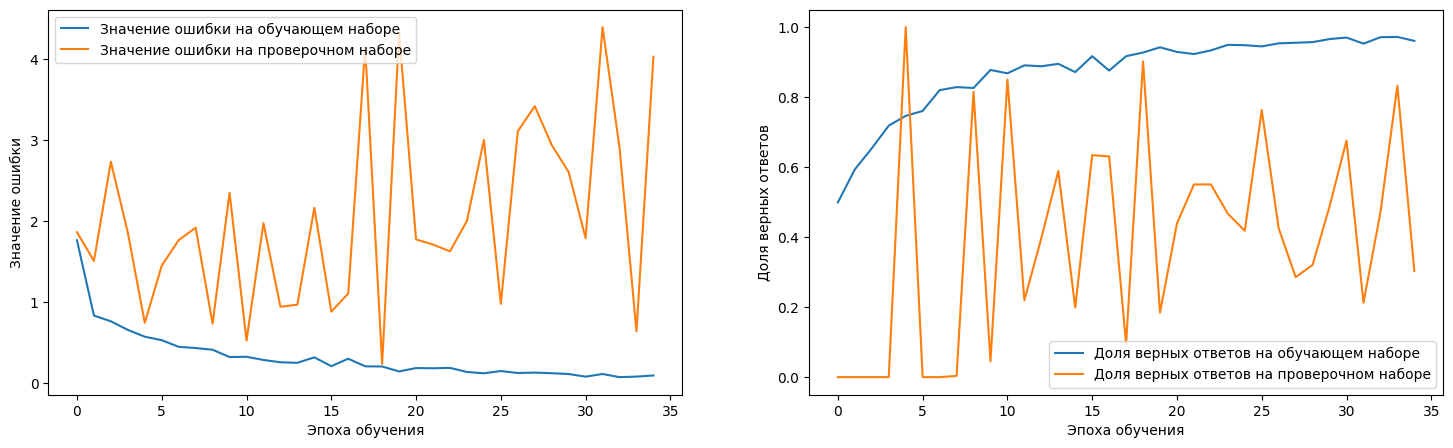

In [17]:
# Отрисовка результата

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

Имеющаяся база мала для решения поставленной задачи. Сеть не находит достаточного количества общих признаков в обучающей базе для уверенной класификации проверочных изображений. Попробовать улучшить результаты можно при помощи аугментации данных.